Lenear Regression

In [1]:
import sys
sys.path.append("../")
from supervised_learning import LinearRegression, PolynomialRegression, LassoRegression, RidgeRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt 

In [2]:

#read data
X, y = make_regression(n_samples=100, n_features=1, noise=20)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


#Standardize

scaler = StandardScaler()
#trainデータからmeanとstdevを計算
scaler.fit(X_train)
#normarize x -> (x - x_mean)/s
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_val = scaler.transform(y_val)
y_test = scaler.transform(y_test)

In [3]:

reg = LassoRegression(degree=4, reg_factor=1, n_iterations=100, learning_rate=1e-2)
reg.fit(X_train, y_train, X_val, y_val)
y_pred = reg.predict(X_test)


iter: 1, train_loss: 0.471, val_loss:  0.429
iter: 2, train_loss: 0.468, val_loss:  0.426
iter: 3, train_loss: 0.455, val_loss:  0.412
iter: 4, train_loss: 0.443, val_loss:  0.400
iter: 5, train_loss: 0.432, val_loss:  0.388
iter: 6, train_loss: 0.422, val_loss:  0.378
iter: 7, train_loss: 0.414, val_loss:  0.369
iter: 8, train_loss: 0.406, val_loss:  0.360
iter: 9, train_loss: 0.399, val_loss:  0.353
iter: 10, train_loss: 0.392, val_loss:  0.346
iter: 11, train_loss: 0.387, val_loss:  0.340
iter: 12, train_loss: 0.382, val_loss:  0.334
iter: 13, train_loss: 0.377, val_loss:  0.329
iter: 14, train_loss: 0.373, val_loss:  0.325
iter: 15, train_loss: 0.369, val_loss:  0.321
iter: 16, train_loss: 0.366, val_loss:  0.317
iter: 17, train_loss: 0.363, val_loss:  0.314
iter: 18, train_loss: 0.361, val_loss:  0.311
iter: 19, train_loss: 0.358, val_loss:  0.308
iter: 20, train_loss: 0.356, val_loss:  0.305
iter: 21, train_loss: 0.354, val_loss:  0.303
iter: 22, train_loss: 0.352, val_loss:  0.3

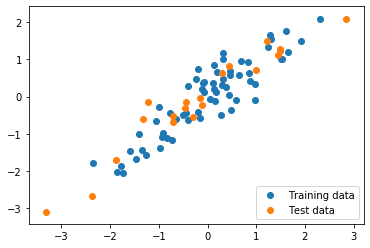

In [4]:
    
    # Plot the results
    m1 = plt.scatter(X_train, y_train)
    m2 = plt.scatter(X_test, y_test)
    plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
    plt.show()